In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [86]:
df=pd.read_csv("insurance.csv")

In [87]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [7]:
df.shape

(1338, 7)

In [8]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print()

Column: age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

Column: sex
male      676
female    662
Name: sex, dtype: int64

Column: bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

Column: children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Column: smoker
no     1064
yes     274
Name: smoker, dtype: int64

Column: region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Col

In [11]:
float_columns = df.select_dtypes(include='float').columns
integer_columns = df.select_dtypes(include='integer').columns

for column in float_columns:  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

    
    print(f"Outliers in float column {column}:")
    print(outliers)
    print("\n")


for column in integer_columns:
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]


    print(f"Outliers in integer column {column}:")
    print(outliers)
    print("\n")

Outliers in float column bmi:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


Outliers in float column charges:
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29    

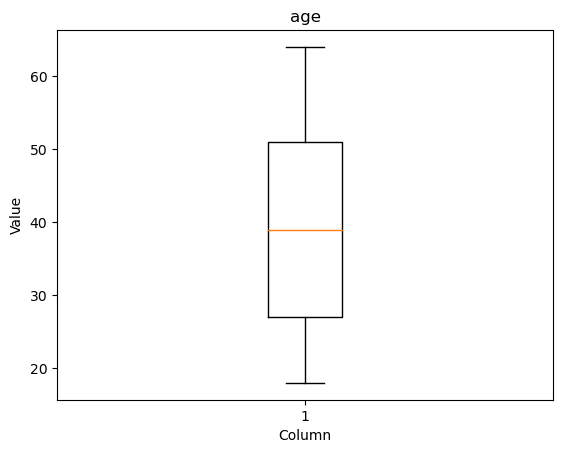

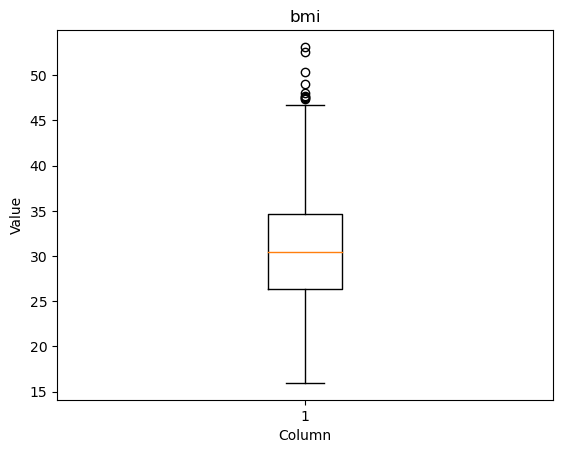

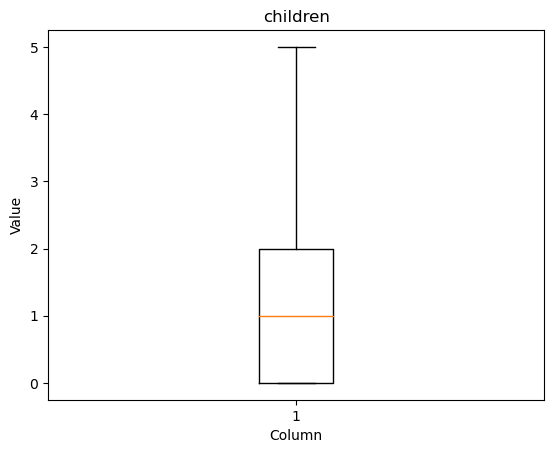

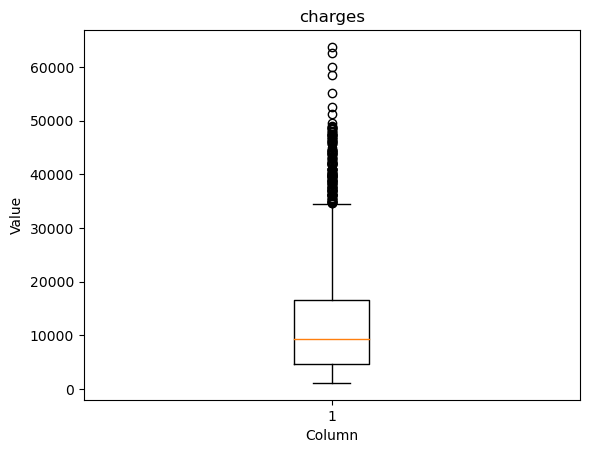

In [12]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
for column in numeric_cols:
    plt.figure()  
    plt.boxplot(df[column].dropna())  
    plt.title(column)
    plt.xlabel('Column')
    plt.ylabel('Value') 
    plt.show() 

In [13]:
import numpy as np
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = len(df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)])

print("Number of outliers:", outliers_count)


Number of outliers: 9


In [14]:
import numpy as np
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = len(df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)])

print("Number of outliers:", outliers_count)


Number of outliers: 139


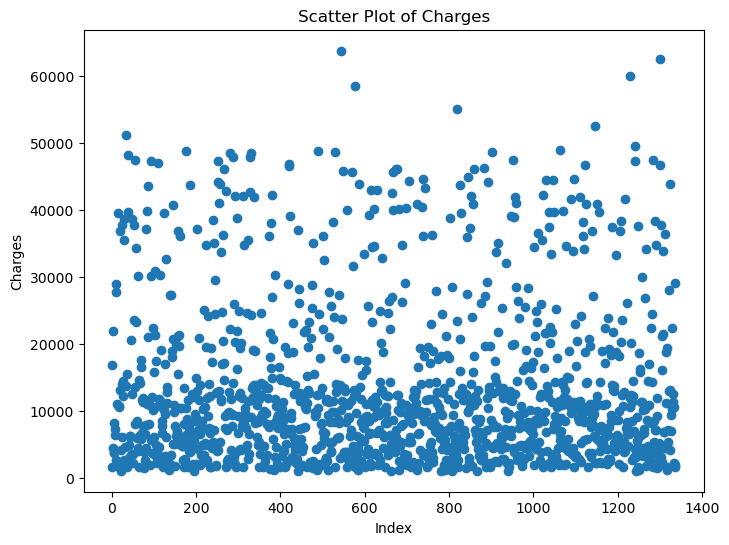

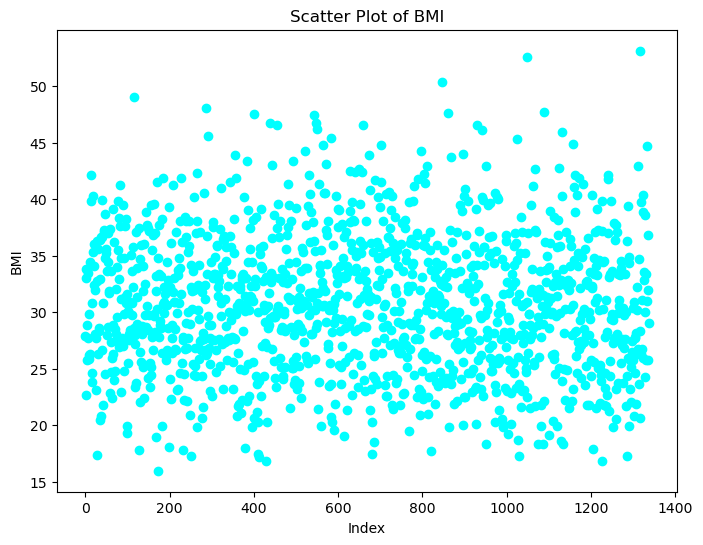

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['charges'])
plt.title('Scatter Plot of Charges')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.show()

# Create the second scatter plot for 'bmi' column
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['bmi'],color='cyan')
plt.title('Scatter Plot of BMI')
plt.xlabel('Index')
plt.ylabel('BMI')
plt.show()

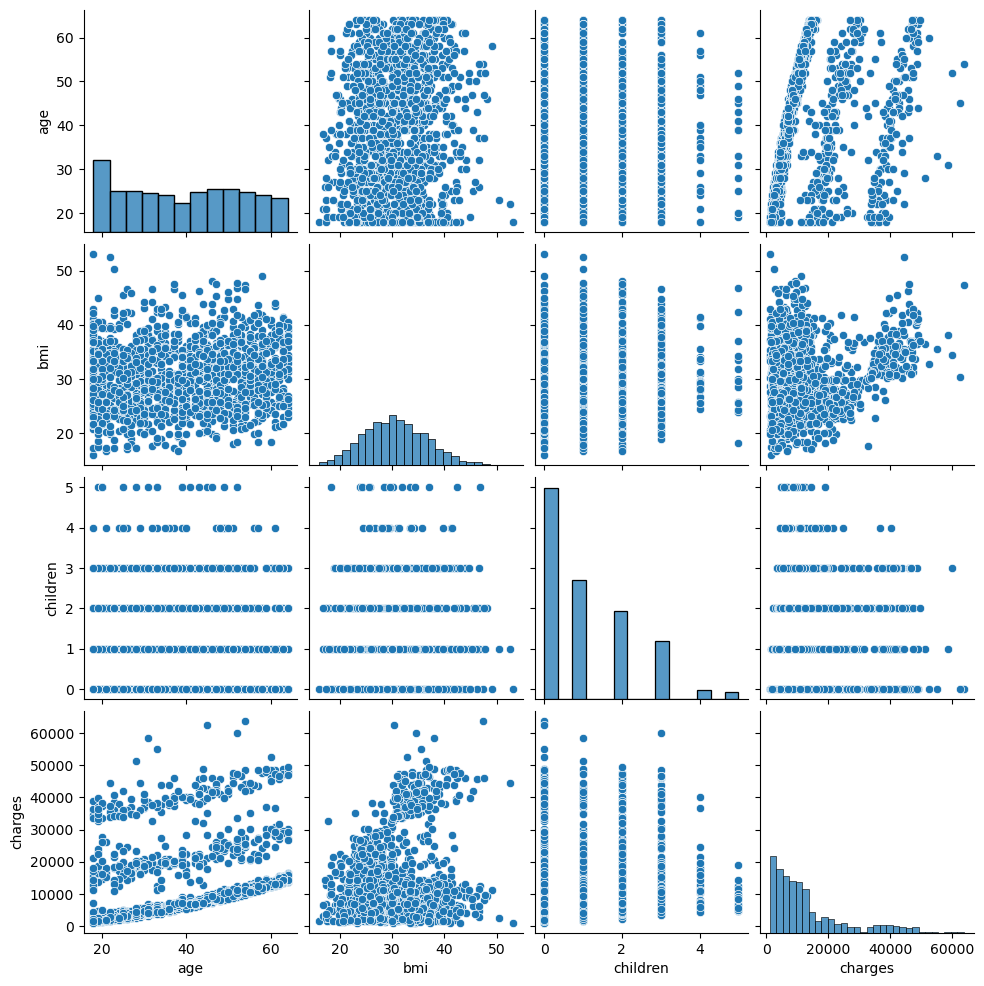

In [16]:
sns.pairplot(df)

In [17]:
column_names = ['region', 'age', 'sex', 'smoker', 'children' ,'bmi']
for column in column_names:
    fig = px.histogram(df, x=column, color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.update_layout(
        title=column,
        xaxis_title="Value",
        yaxis_title="Frequency"
    )
    fig.show()

In [18]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [89]:
import pandas as pd

# Assuming you have the DataFrame 'df' with the correct column names

age_ranges = [
    (0, 2, 'Baby'),
    (3, 16, 'Children'),
    (17, 30, 'Young Adults'),
    (31, 45, 'Old Adults'),
    (46, float('inf'), 'Older Adults')
]

# Create the 'Age_Category' column based on the age ranges
df['Age_Category'] = pd.cut(df['age'], bins=[start-0.5 for start, _, _ in age_ranges] + [float('inf')],
                            labels=[category for _, _, category in age_ranges], right=False)

# Print the updated DataFrame
print(df)

# Save the DataFrame to a new CSV file named 'age.csv'
df.to_csv('age.csv', index=False)


      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      Age_Category  
0     Young Adults  
1     Young Adults  
2     Young Adults  
3       Old Adults  
4       Old Adults  
...            ...  
1333  Older 

In [90]:
bmi_ranges = [
    (float('-inf'), 16.0, 'Underweight (Severe thinness)'),
    (16.0, 16.9, 'Underweight (Moderate thinness)'),
    (17.0, 18.4, 'Underweight (Mild thinness)'),
    (18.5, 24.9, 'Normal range'),
    (25.0, 29.9, 'Overweight (Pre-obese)'),
    (30.0, 34.9, 'Obese (Class I)'),
    (35.0, 39.9, 'Obese (Class II)'),
    (40.0, float('inf'), 'Obese (Class III)')
]

# Create a new column 'BMI Category' and assign the corresponding category for each BMI value
df['BMI_Category'] = pd.cut(df['bmi'], bins=[start for start, _, _ in bmi_ranges] + [float('inf')], 
                            labels=[category for _, _, category in bmi_ranges], right=False)

# Print the DataFrame with the 'BMI Category' column
df.to_csv('bmiasa.csv', index=False)

print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      Age_Category            BMI_Category  
0     Young Adults  Overweight (Pre-obese)  
1     Young Adults         Obese (Class I)  
2     Young Adults      

In [21]:
column_names = ['BMI_Category', 'Age_Category']
for column in column_names:
    fig = px.histogram(df, x=column)
    fig.update_layout(
        title=column,
        xaxis_title="Value",
        yaxis_title="Frequency"
    )
    fig.show()

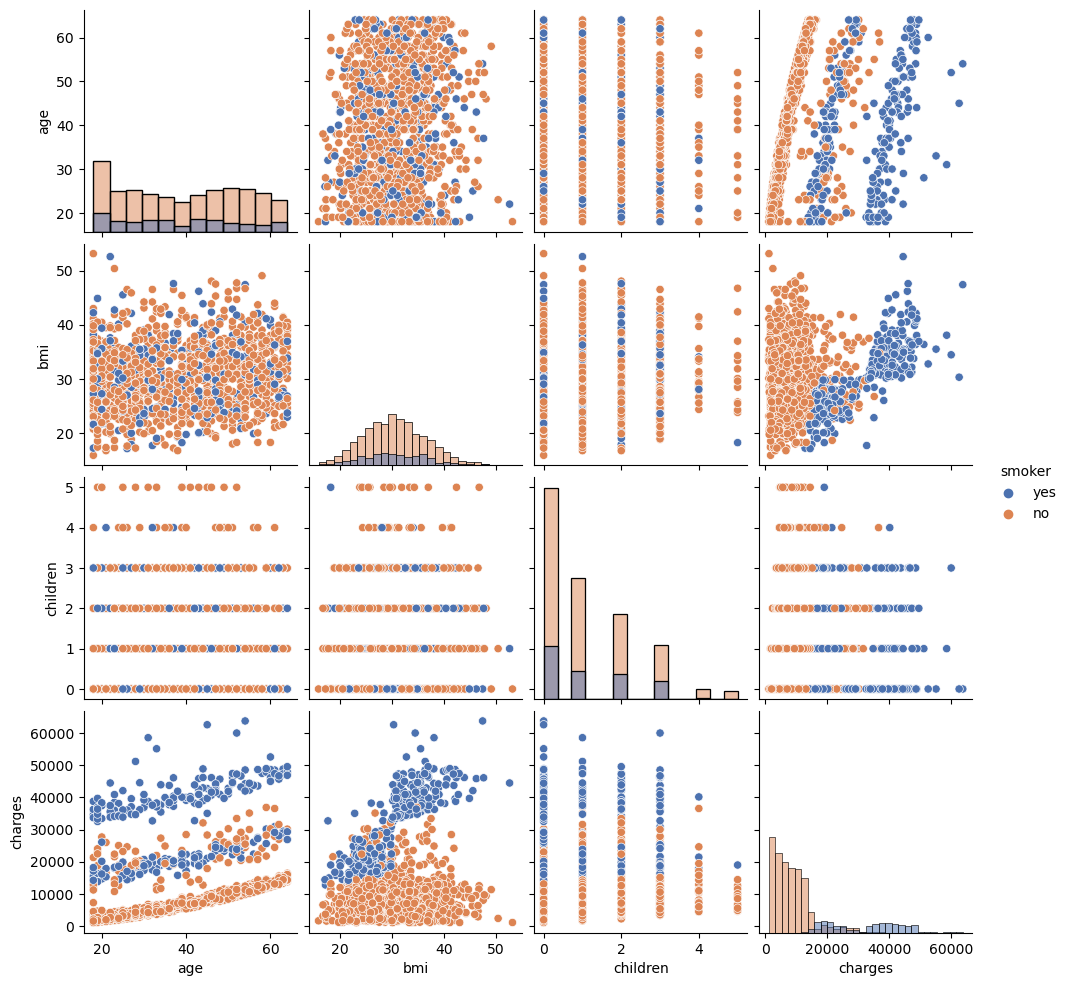

In [22]:
sns.pairplot(df,hue="smoker",palette="deep",diag_kind="hist")

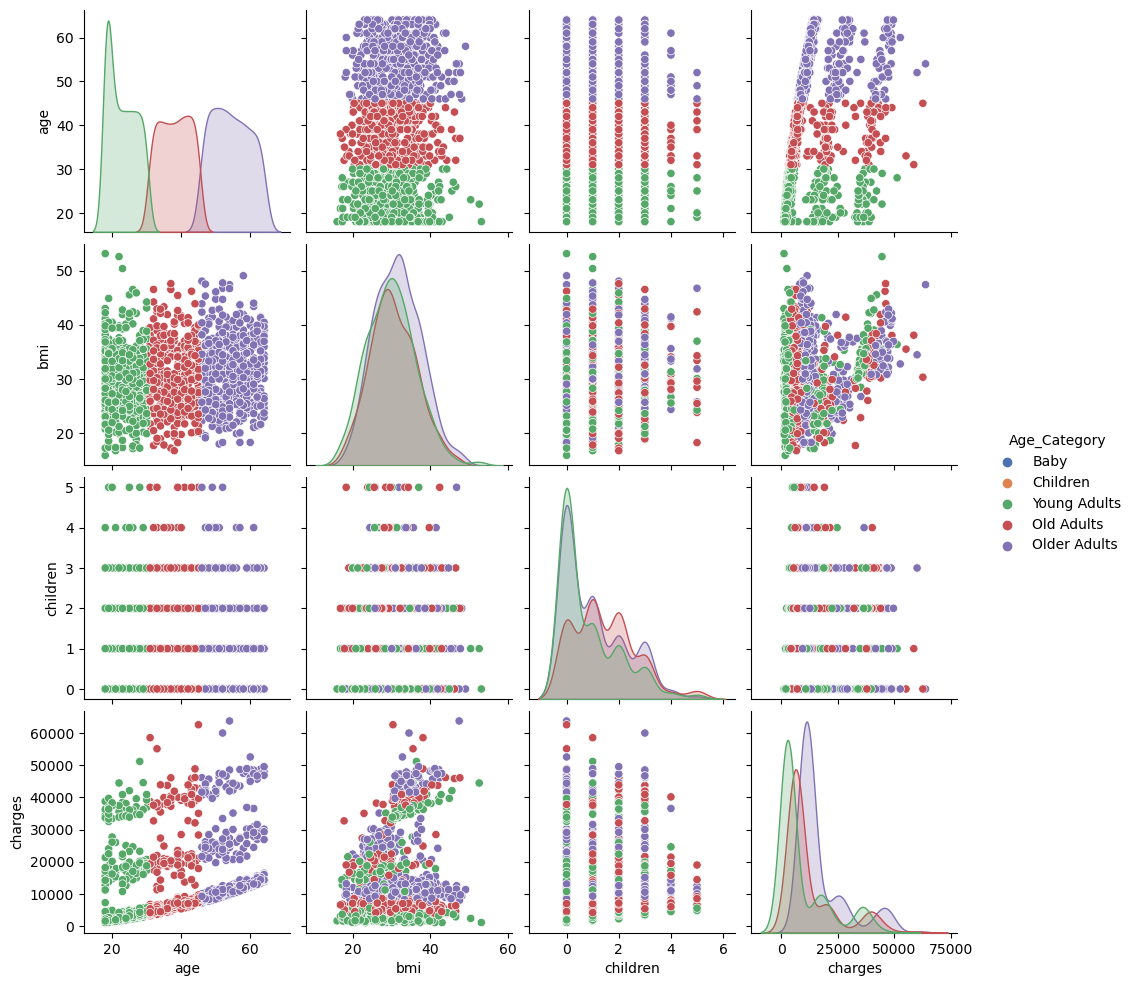

In [23]:
sns.pairplot(df,hue="Age_Category",palette="deep")

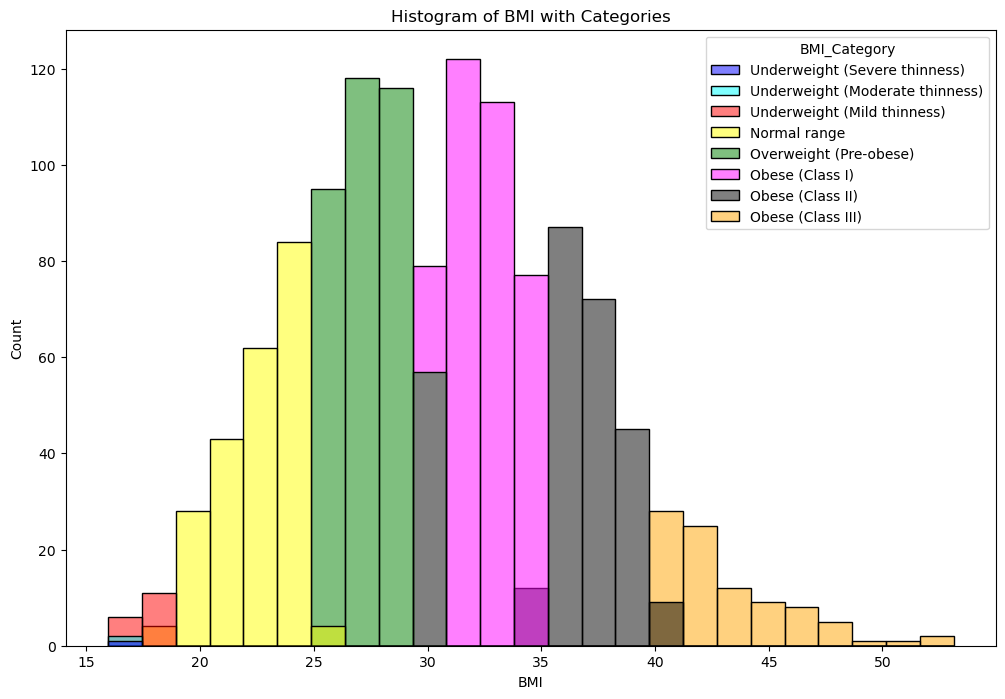

In [24]:
custom_palette = ["blue", "cyan", "red", "yellow", "green", "magenta", "black", "orange"]
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='bmi', hue='BMI_Category', palette=custom_palette)
plt.title('Histogram of BMI with Categories')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5480\1633498967.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



Text(0, 0.5, 'Count')

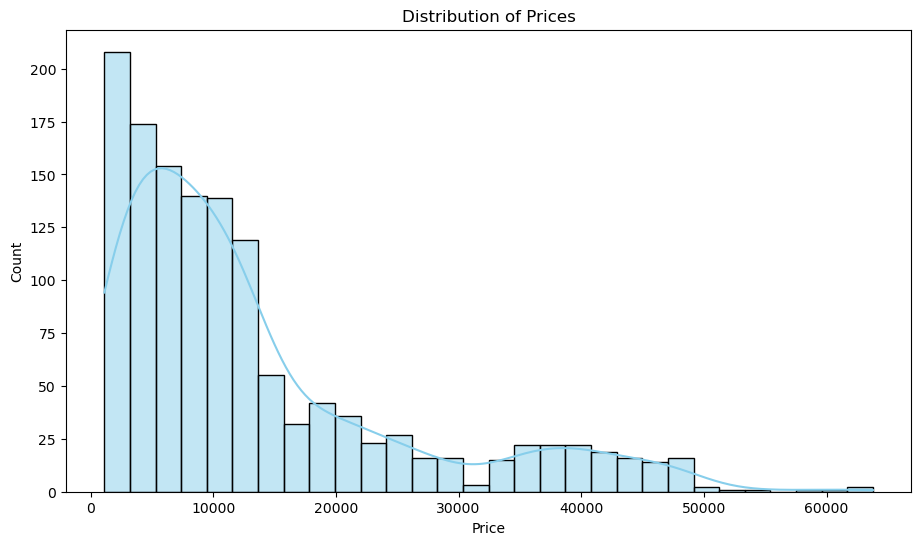

In [25]:
plt.subplots(figsize=(24, 6))
plt.subplot(1, 2, 2)
sns.histplot(x='charges', data=df, kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')

In [26]:
cross_table = pd.crosstab(df['Age_Category'], df['BMI_Category'])
styled_table = cross_table.style.background_gradient(cmap='Blues')
styled_table

In [27]:
cross_table = pd.crosstab(df['smoker'], df['Age_Category'])
styled_table = cross_table.style.background_gradient(cmap='Blues')
styled_table

In [28]:
cross_table = pd.crosstab(df['children'], df['Age_Category'])
styled_table = cross_table.style.background_gradient(cmap='Blues')
styled_table

In [29]:
import plotly.graph_objects as go
data = pd.read_csv('insurance.csv')
grouped_data = data.groupby('sex')['charges'].sum()
fig = go.Figure(data=[go.Bar(x=grouped_data.index, y=grouped_data.values)])
fig.update_layout(
    title='Total Charges by Gender',
    xaxis=dict(title='Sex'),
    yaxis=dict(title='Total Charges')
)
fig.show()

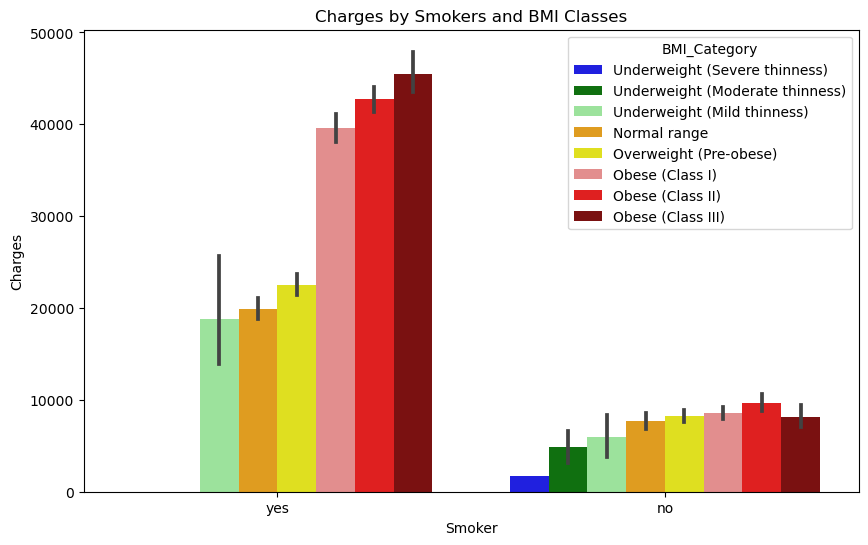

In [30]:
color_palette = {
    'Underweight (Severe thinness)': 'blue',
    'Underweight (Moderate thinness)': 'green',
    'Underweight (Mild thinness)': 'lightgreen',
    'Normal range': 'orange',
    'Overweight (Pre-obese)': 'yellow',
    'Obese (Class I)': 'lightcoral',
    'Obese (Class II)': 'red',
    'Obese (Class III)': 'darkred'
}

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(data=df, x='smoker', y='charges', hue='BMI_Category', palette=color_palette)

# Set the chart title and axis labels
plt.title('Charges by Smokers and BMI Classes')
plt.xlabel('Smoker')
plt.ylabel('Charges')

# Show the plot
plt.show()

In [31]:
import plotly.graph_objects as go

# Define markers for 'smoker' column
markers = {'yes': 'square', 'no': 'x'}

# Define colors for 'BMI_Category'
colors = {
    'Underweight (Severe thinness)': 'blue',
    'Underweight (Moderate thinness)': 'green',
    'Underweight (Mild thinness)': 'lightgreen',
    'Normal range': 'orange',
    'Overweight (Pre-obese)': 'yellow',
    'Obese (Class I)': 'lightcoral',
    'Obese (Class II)': 'red',
    'Obese (Class III)': 'darkred'
}

# Create the scatter plot using Plotly
fig = go.Figure()

# Add traces for each combination of 'BMI_Category' and 'smoker'
for bmi_class in df['BMI_Category'].unique():
    for smoker in df['smoker'].unique():
        data_filtered = df[(df['BMI_Category'] == bmi_class) & (df['smoker'] == smoker)]
        fig.add_trace(go.Scatter(
            x=data_filtered['age'],
            y=data_filtered['charges'],
            mode='markers',
            marker_symbol=markers[smoker],
            marker_color=colors[bmi_class],
            name=f"BMI: {bmi_class}, Smoker: {smoker}"
        ))

# Set the chart title and axis labels
fig.update_layout(
    title='Scatter Plot: Charges by Age',
    xaxis_title='Age',
    yaxis_title='Charges'
)

# Show the plot
fig.show()


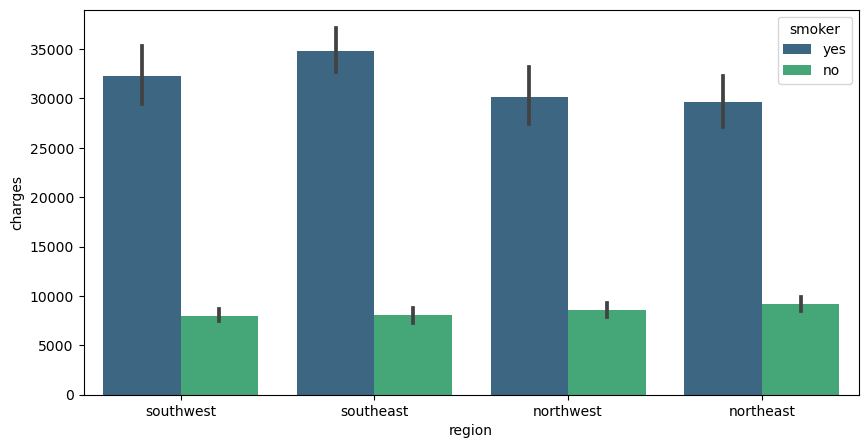

In [32]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x = 'region', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='viridis')

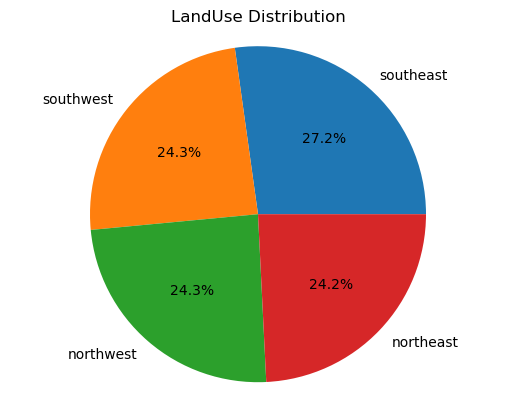

In [33]:
landuse_counts = df['region'].value_counts()
fig, ax = plt.subplots()
ax.pie(landuse_counts.values, labels=landuse_counts.index, autopct='%1.1f%%')
ax.set_title('LandUse Distribution')
ax.axis('equal')
plt.show()

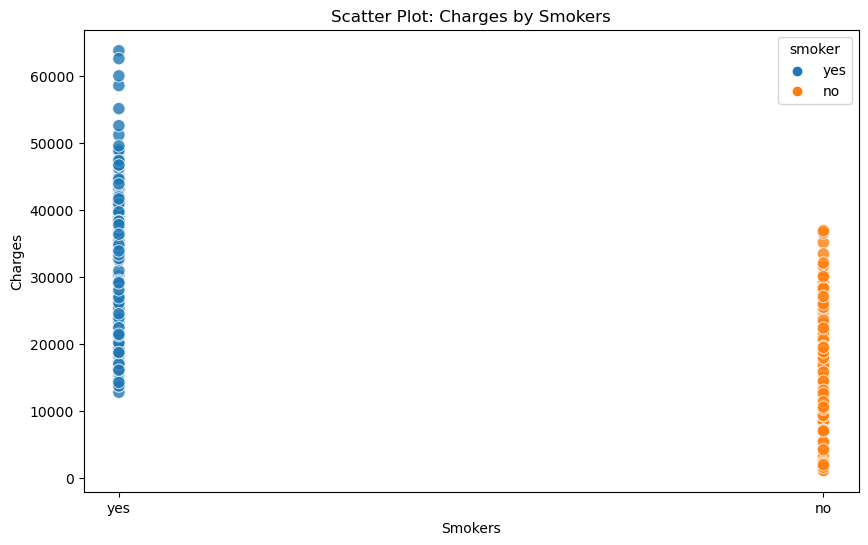

In [34]:

plt.figure(figsize=(10, 6))

# Create the scatter plot using Seaborn
sns.scatterplot(data=df, x='smoker', y='charges', hue='smoker', s=80, alpha=0.8)

# Set the chart title and axis labels
plt.title('Scatter Plot: Charges by Smokers')
plt.xlabel('Smokers')
plt.ylabel('Charges')

# Show the plot
plt.show()


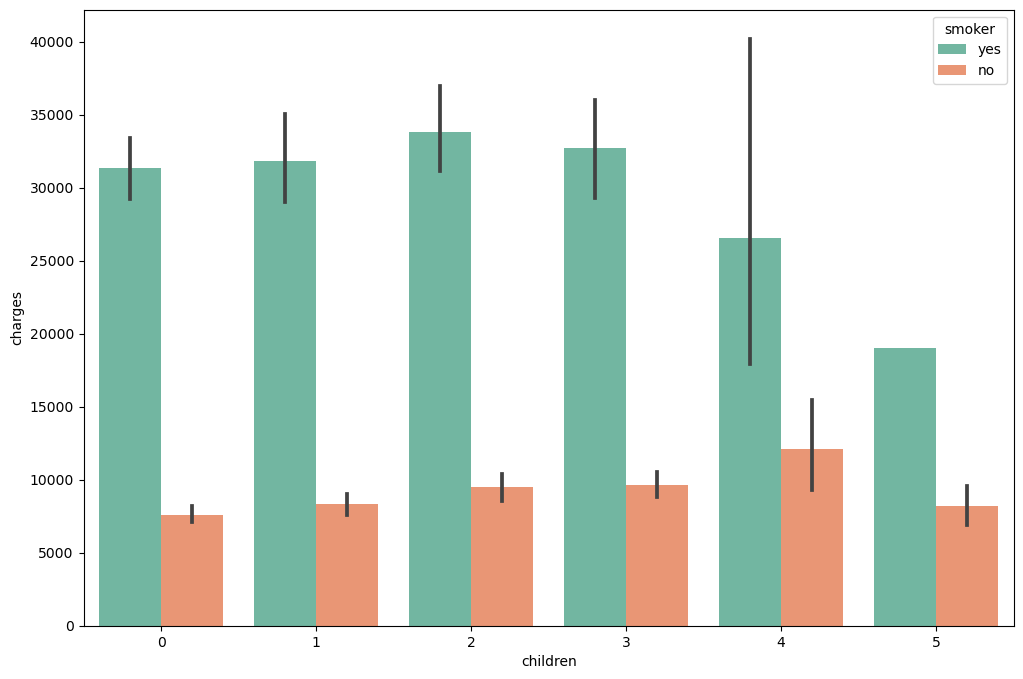

In [35]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='children', y='charges', hue='smoker', data=df, palette='Set2')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5480\2983282606.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



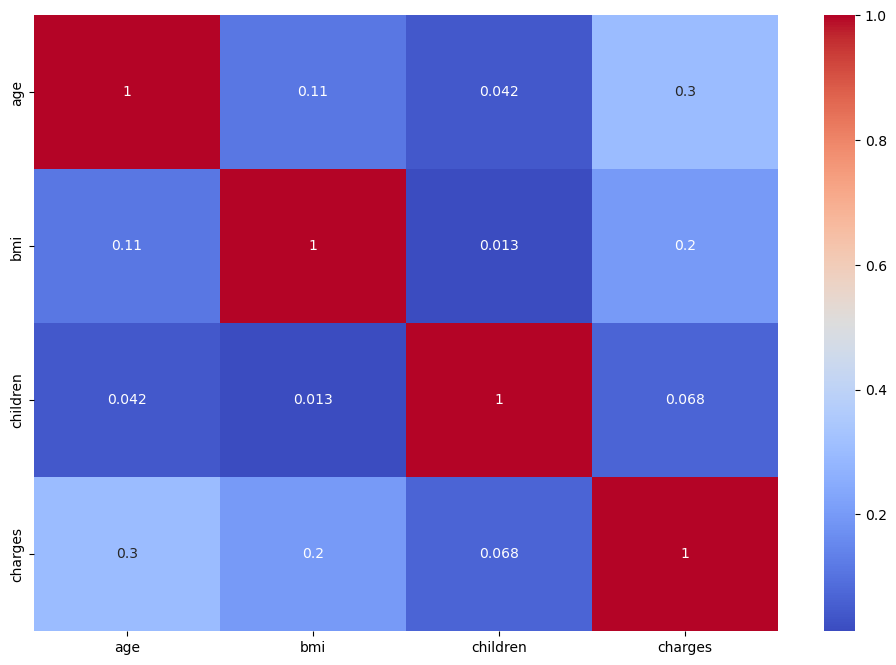

In [36]:
corr = df.corr()
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr, cmap='coolwarm', annot=True)
fig = ax.get_figure()

In [37]:
# label Encoding 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["sex"] = label.fit_transform(df["sex"]) 
df["smoker"] = label.fit_transform(df["smoker"]) 
df["region"] = label.fit_transform(df["region"]) 

In [38]:
df.head()

age  sex     bmi  children  smoker  region      charges  Age_Category  \
0   19    0  27.900         0       1       3  16884.92400  Young Adults   
1   18    1  33.770         1       0       2   1725.55230  Young Adults   
2   28    1  33.000         3       0       2   4449.46200  Young Adults   
3   33    1  22.705         0       0       1  21984.47061    Old Adults   
4   32    1  28.880         0       0       1   3866.85520    Old Adults   

             BMI_Category  
0  Overweight (Pre-obese)  
1         Obese (Class I)  
2         Obese (Class I)  
3            Normal range  
4  Overweight (Pre-obese)

In [39]:
df.dtypes

age                int64
sex                int32
bmi              float64
children           int64
smoker             int32
region             int32
charges          float64
Age_Category    category
BMI_Category    category
dtype: object

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5480\2983282606.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



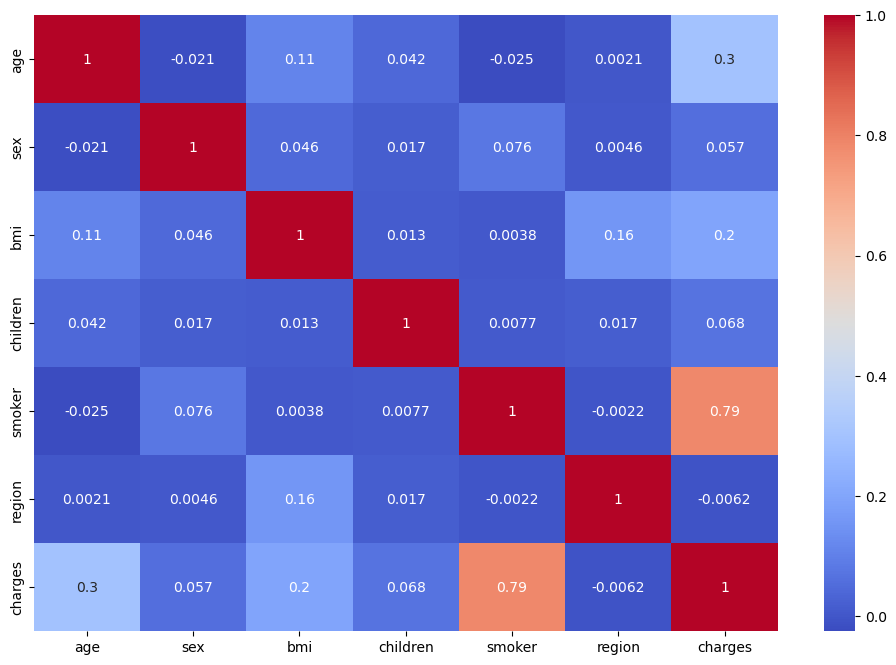

In [40]:
corr = df.corr()
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr, cmap='coolwarm', annot=True)
fig = ax.get_figure()

In [41]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Extract the feature matrix and target variable
X = df[numeric_columns]
y = df['charges']  

# Perform feature selection using mutual information regression
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X, y)

scores = selector.scores_
feature_names = X.columns


feature_scores = dict(zip(feature_names, scores))


sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature names and their scores
for feature, score in sorted_features:
    print(f"Feature: {feature}, Score: {score}")

Feature: charges, Score: 5.942439833630058
Feature: age, Score: 1.4968918718112687
Feature: children, Score: 0.16209994784159898
Feature: bmi, Score: 0.0730936759814309


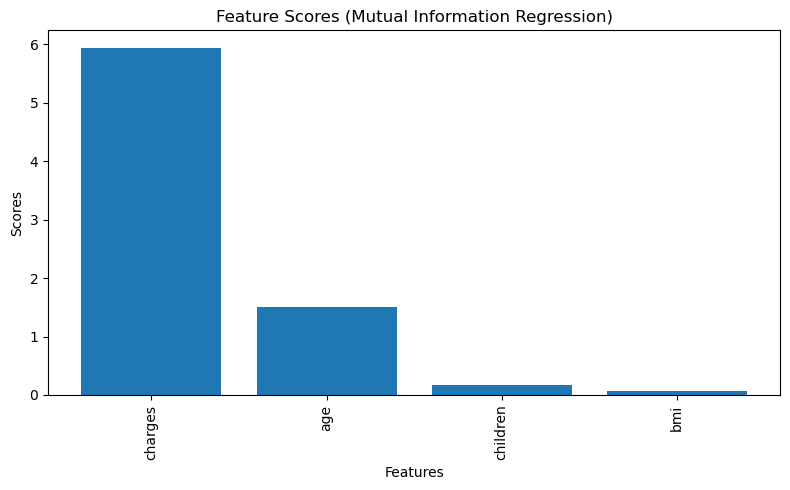

In [42]:
# Extract feature names and scores for plotting
features, scores = zip(*sorted_features)

# Create a bar graph of feature scores
plt.figure(figsize=(8, 5))
plt.bar(features, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Feature Scores (Mutual Information Regression)')
plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import train_test_split as tt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = df.drop(['charges','Age_Category','BMI_Category'], axis = 1)
y = df['charges']

x_train, x_test, y_train, y_test = tt(x, y, test_size=0.2, random_state=0)

In [44]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [45]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [46]:
print("x_test:\n" + str(x_test) + "\n")
print("x_train:\n" + str(x_train) + "\n")
print("y_test:\n" + str(y_test) + "\n")
print("y_train:\n" + str(y_train) + "\n")


x_test:
      age  sex     bmi  children  smoker  region
578    52    1  30.200         1       0       3
610    47    0  29.370         1       0       2
569    48    1  40.565         2       1       1
1034   61    1  38.380         0       0       1
198    51    0  18.050         0       0       1
...   ...  ...     ...       ...     ...     ...
1084   62    0  30.495         2       0       1
726    41    1  28.405         1       0       1
1132   57    1  40.280         0       0       0
725    30    0  39.050         3       1       2
963    46    1  24.795         3       0       0

[268 rows x 6 columns]

x_train:
      age  sex     bmi  children  smoker  region
621    37    1  34.100         4       1       3
194    18    1  34.430         0       0       2
240    23    0  36.670         2       1       0
1168   32    1  35.200         2       0       3
1192   58    0  32.395         1       0       0
...   ...  ...     ...       ...     ...     ...
763    27    1  26.030     

In [47]:
print("x_test:\n" + str(x.shape) + "\n")
print("x_train:\n" + str(x_train.shape) + "\n")
print("x_test:\n" + str(x_test.shape) + "\n")


x_test:
(1338, 6)

x_train:
(1070, 6)

x_test:
(268, 6)



In [48]:
# loading the Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [49]:
# prediction on training data
training_data_prediction =regressor.predict(x_train)

In [50]:
# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7368306228430945


In [51]:
# prediction on test data
test_data_prediction =regressor.predict(x_test)

In [52]:
# R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7998747145449959


In [53]:
print(regressor.score(x_test, y_test))

0.7998747145449959


In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of alpha values to test
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Perform cross-validation for each alpha value
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    mse_scores = -cross_val_score(ridge, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_mse = np.mean(mse_scores)
    print(f"Alpha={alpha}, Average MSE: {avg_mse}")

Alpha=0.1, Average MSE: 38204905.58233535
Alpha=0.2, Average MSE: 38205036.716369435
Alpha=0.3, Average MSE: 38205262.39272244
Alpha=0.4, Average MSE: 38205582.199043125
Alpha=0.5, Average MSE: 38205995.72477924
Alpha=0.6, Average MSE: 38206502.56116879
Alpha=0.7, Average MSE: 38207102.30123131
Alpha=0.8, Average MSE: 38207794.539759316
Alpha=0.9, Average MSE: 38208578.87330967
Alpha=1.0, Average MSE: 38209454.900195025


In [55]:
Ridge = Ridge(alpha=1.0)
Ridge.fit(x_train, y_train)
print(Ridge.score(x_test, y_test))

0.7995147965249457


In [56]:
from sklearn.metrics import mean_squared_error
# Step 5: Make predictions on the testing data
y_pred = Ridge.predict(x_test)

# Step 6: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(mse)

31903202.87512908


In [57]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.score(x_test, y_test))

0.7998690236224706


In [58]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'friedman_mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred),
       metrics.r2_score(y_test,x_test_pred)))

MSE train data: 3627543.313, MSE test data: 19580381.390
R2 train data: 0.975, R2 test data: 0.877


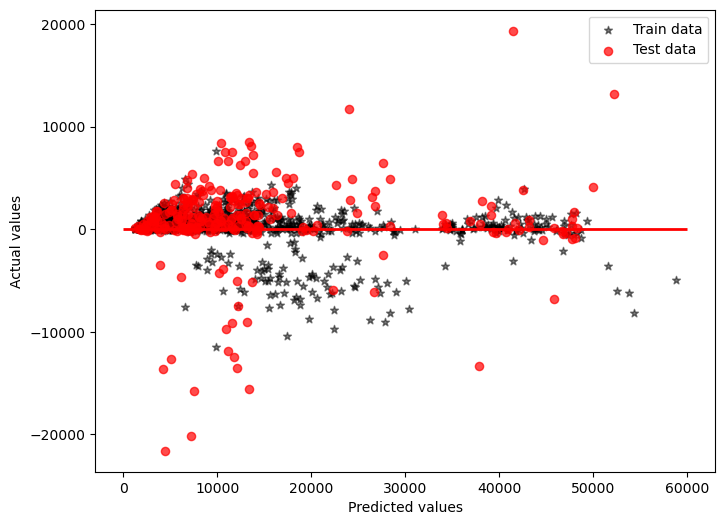

In [59]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'black', marker = '*', s = 35, alpha = 0.5,
          label = 'Train data')

plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'red', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1. smoker (0.601678)
2. bmi (0.218492)
3. age (0.136950)
4. children (0.021107)
5. region (0.015409)
6. sex (0.006364)


<BarContainer object of 6 artists>

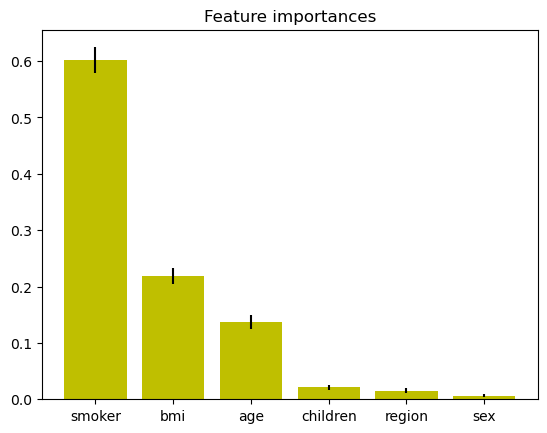

In [60]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

importance_list = []
for f in range(min(x.shape[1], len(variables))):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d. %s (%f)" % (f + 1, variable, importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [61]:
df.head()

age  sex     bmi  children  smoker  region      charges  Age_Category  \
0   19    0  27.900         0       1       3  16884.92400  Young Adults   
1   18    1  33.770         1       0       2   1725.55230  Young Adults   
2   28    1  33.000         3       0       2   4449.46200  Young Adults   
3   33    1  22.705         0       0       1  21984.47061    Old Adults   
4   32    1  28.880         0       0       1   3866.85520    Old Adults   

             BMI_Category  
0  Overweight (Pre-obese)  
1         Obese (Class I)  
2         Obese (Class I)  
3            Normal range  
4  Overweight (Pre-obese)

In [62]:
from sklearn.preprocessing import PolynomialFeatures

x = df.drop(['charges','Age_Category','BMI_Category','sex'], axis = 1)
y = df.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)

x_train, x_test, y_train, y_test = tt(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)


print(Pol_reg.score(x_test, y_test))

0.8823014989594768


In [75]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming you have already trained and fitted the Polynomial Regression model (Pol_reg) and have the test data (x_test, y_test)

# Predicting the charges using the trained model
y_test_pred = Pol_reg.predict(x_test)

# Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Display the DataFrame
print(df)

# Save the DataFrame to a CSV file named 'pre.csv'
df.to_csv('pre.csv', index=False)


           Actual     Predicted
578    9724.53000  11851.170052
610    8547.69130  10162.090622
569   45702.02235  48995.768687
1034  12950.07120  14201.008650
198    9644.25250   8389.389960
...           ...           ...
1084  15019.76005  16700.567688
726    6664.68595   8686.775634
1132  20709.02034  13213.136268
725   40932.42950  41300.963900
963    9500.57305  11813.375444

[268 rows x 2 columns]


In [64]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train,y_train)

SVR()

In [65]:
y_pred1 = svm.predict(x_test)
print(svm.score(x_test, y_test))

-0.10244523750060863


In [66]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [67]:
y_pred2 = gr.predict(x_test)
print(gr.score(x_test, y_test))

0.8878137795486313


In [68]:
print("Gradient Boosting Score -")
print(gr.score(x_test, y_test))
print(" ")
print("Polynomial Regression Score - ")
print(Pol_reg.score(x_test, y_test))

Gradient Boosting Score -
0.8878137795486313
 
Polynomial Regression Score - 
0.8823014989594768


In [69]:
df1 = pd.DataFrame({'Actual':y_test,'PloyR':y_test_pred,
                  'svm':y_pred1,'gr':y_pred2})

In [70]:
df1

Actual         PloyR          svm            gr
578    9724.53000  11851.170052  9487.106399  10903.234075
610    8547.69130  10162.090622  9414.321005   9798.363714
569   45702.02235  48995.768687  9453.364051  46026.049943
1034  12950.07120  14201.008650  9569.626359  13751.737851
198    9644.25250   8389.389960  9437.636245   9378.565973
...           ...           ...          ...           ...
1084  15019.76005  16700.567688  9575.853740  16311.568785
726    6664.68595   8686.775634  9333.588405   7278.063702
1132  20709.02034  13213.136268  9547.832245  11344.905953
725   40932.42950  41300.963900  9266.387274  42979.884784
963    9500.57305  11813.375444  9389.042789  10644.229651

[268 rows x 4 columns]

In [71]:
import pandas as pd

df1 = pd.DataFrame({'Actual': y_test, 'PloyR': y_test_pred, 'svm': y_pred1, 'gr': y_pred2})

# Calculate error percentage for specific columns
cols_to_calculate = ['PloyR', 'svm', 'gr']
for col in cols_to_calculate:
    df1[col + '_err_per'] = ((df1[col] - df1['Actual']) / df1['Actual']) * 100

# Select columns to display
cols_to_display = ['Actual'] + [col + '_err_per' for col in cols_to_calculate]
df1[cols_to_display]

Actual  PloyR_err_per  svm_err_per  gr_err_per
578    9724.53000      21.868821    -2.441492   12.120936
610    8547.69130      18.886963    10.138758   14.631698
569   45702.02235       7.207003   -79.315217    0.709001
1034  12950.07120       9.659696   -26.103678    6.190442
198    9644.25250     -13.011506    -2.142377   -2.754869
...           ...            ...          ...         ...
1084  15019.76005      11.190642   -36.244962    8.600728
726    6664.68595      30.340360    40.045435    9.203401
1132  20709.02034     -36.196227   -53.895297  -45.217563
725   40932.42950       0.900348   -77.361746    5.002037
963    9500.57305      24.343820    -1.173932   12.037764

[268 rows x 4 columns]

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have the actual labels in y_true and predicted labels in y_pred

# Calculate the precision, recall, and F1 score
y_true = [1, 0, 1, 0, 1]  # Replace this list with your actual ground truth labels
y_pred = [1, 1, 1, 0, 0]  # Replace this list with your predicted labels

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [93]:
model = RandomForestClassifier()


In [94]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}


In [96]:
from sklearn.model_selection import GridSearchCV

# Assuming you have defined the model and param_grid earlier in your code
# model = SomeModel()
# param_grid = {'parameter1': [value1, value2, ...], 'parameter2': [value3, value4, ...], ...}

# Assuming you have the features in the variable 'x' and the target labels in 'y_categorical'

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x, y_categorical)


NameError: name 'y_categorical' is not defined

In [ ]:
import numpy as np
import pandas as pd

# Assuming your continuous target variable is in a pandas Series called 'y'

# Define the bins or thresholds for converting the continuous values into categories
bins = [0, 1000, 5000, np.inf]  # Adjust the values and ranges as per your data

# Define the corresponding labels for each category
labels = ['Low', 'Medium', 'High']  # Adjust the labels as per your preference

# Perform binning to convert continuous values into categorical labels
y_categorical = pd.cut(y, bins=bins, labels=labels)

# Print the converted categorical labels
print(y_categorical)


In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [ ]:
best_model = RandomForestClassifier(**best_params)
best_model.fit(x, y_categorical)
